### 1. Import data and revelant packages 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/bt4222code'

In [ ]:
df = pd.read_csv(path + '/combined_psf.csv', index_col=0)
df.head()
df = df.reset_index(drop=True)

In [ ]:
df['floor_range'] = df['floor_range'].str.replace('#', '')
df.head()

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,month,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,2020-02,5643.51277,974.570312
1,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-09,3315.28120,1508.167693
2,5,ZEHNDER ROAD,Semi-detached,999.0,27,6,8,0,-1.0,1.282130,103.786879,-,0.122456,2018-06,3379.86460,1405.381742
3,5,NEO PEE TECK LANE,Strata Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2021-03,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.0,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,2020-03,1714.68927,1533.805597


In [ ]:
# Label Encoding 
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'], df['street'].cat.codes))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'], df['propertyType'].cat.codes))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'], df['floor_range'].cat.codes))
df['floor_range'] = df['floor_range'].cat.codes



In [ ]:
test_df

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_range,sentiment,floor_area_sqft,price_psf
0,5,ZEHNDER ROAD,Semi-detached,999.00,27,6,8,0,-1.0,1.282130,103.786879,-,0.154684,5643.51277,974.570312
3,5,NEO PEE TECK LANE,Strata Terrace,999.00,27,6,8,2,-1.0,1.292047,103.768591,-,0.139334,2002.08540,939.020883
4,5,NEO PEE TECK LANE,Terrace,999.00,27,6,8,2,-1.0,1.292047,103.768591,-,0.154684,1714.68927,1533.805597
5,4,COVE DRIVE,Condominium,85.33,8,4,2,0,-1.0,1.244208,103.827487,01-05,0.128195,2432.64140,1397.657707
6,4,COVE DRIVE,Condominium,84.75,8,4,2,0,-1.0,1.244208,103.827487,01-05,0.084719,2185.07170,1601.778102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135084,27,YISHUN AVE 6,EXECUTIVE,66.67,16,2,19,0,64.0,1.426142,103.849653,11-15,0.084183,1593.05720,411.159122
135085,27,YISHUN RING ROAD,EXECUTIVE,66.83,16,2,19,0,64.0,1.424340,103.845070,11-15,0.084183,1571.52940,413.609825
135086,27,YISHUN RING ROAD,EXECUTIVE,66.17,16,2,19,0,64.0,1.424340,103.845070,01-05,0.084183,1571.52940,386.247944
135087,27,YISHUN ST 81,EXECUTIVE,66.00,16,2,19,0,64.0,1.415253,103.837021,01-05,0.084183,1528.47380,438.345754


In [ ]:
# Label Encoding 
df['street'] = df['street'].astype('category')
street_dict = dict(zip(df['street'], df['street'].cat.codes))
df['street'] = df['street'].cat.codes

df['propertyType'] = df['propertyType'].astype('category')
property_dict = dict(zip(df['propertyType'], df['propertyType'].cat.codes))
df['propertyType'] = df['propertyType'].cat.codes

df['floor_range'] = df['floor_range'].astype('category')
floor_dict = dict(zip(df['floor_range'], df['floor_range'].cat.codes))
df['floor_range'] = df['floor_range'].cat.codes

df['month']= pd.to_datetime(df['month'])
train_df = df[df.month < "2020-01-01"]
train_df = train_df.drop('month', axis=1)
test_df = df[df.month >= "2020-01-01"]
test_df = test_df.drop('month', axis=1)

X_train = train_df.loc[:, train_df.columns != 'price_psf']
y_train = train_df['price_psf']

X_test = test_df.loc[:, test_df.columns != 'price_psf']
y_test = test_df['price_psf']
"""
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('price_psf', axis=1),
                                                    df['price_psf'], 
                                                    test_size=0.2,
                                                    random_state=1)
"""
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(89135, 14)
(45954, 14)
(89135,)
(45954,)


In [ ]:
# Fit and transform X training and testing
scaler = MinMaxScaler()
col = ['remaining_lease', 'school', 'hawkercentre', 'supermarkets',
      'Bus Stops Nearby', 'crime_number', 'floor_area_sqft']
x = X_train[col].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns = col, index = X_train.index)
X_train[col] = df_temp

x_test = X_test[col].values
x_test_scaled = scaler.transform(x_test)
df_temp = pd.DataFrame(x_test_scaled, columns = col, index = X_test.index)
X_test[col] = df_temp

# Fit and transform Y training and testing
y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1,1)).reshape(1,-1)[0]
y_test = y_scaler.transform(y_test.values.reshape(-1, 1)).reshape(1,-1)[0]

print(y_train.shape)
print(y_test.shape)

y_train = pd.DataFrame(y_train.tolist(), columns=['price_psf'])
y_test = pd.DataFrame(y_test.tolist(), columns=['price_psf'])

(89135,)
(45954,)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
y_train

,price_psf
0,0.073657
1,0.215543
2,0.070002
3,0.131599
4,0.144327
...,...
108066,0.051209
108067,0.057357
108068,0.074698
108069,0.201239


### 2.MACHINE LEARNING

In [ ]:
!pip install tensorflow-addons
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_addons as tfa
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
X_train.rename(columns={'Bus Stops Nearby':'busstop'}, inplace=True)
X_test.rename(columns={'Bus Stops Nearby':'busstop'}, inplace=True)

In [ ]:
_, longitude_boundaries = np.histogram(X_train['longitude'])
_, latitude_boundaries = np.histogram(X_train['latitude'])

def assign_bucket(x, ranges):
    if x <= ranges[0]:
        return 0
    
    for i in range(1, len(ranges) - 1):
        if x <= ranges[i]:
            return i - 1
    return len(ranges) - 2

X_train['lgt_discrete'] = X_train['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_train['lat_discrete'] = X_train['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))
X_test['lgt_discrete'] = X_test['longitude'].apply(lambda x: assign_bucket(x, longitude_boundaries))
X_test['lat_discrete'] = X_test['latitude'].apply(lambda x: assign_bucket(x, latitude_boundaries))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
features_lat_lgn_train = enc.fit_transform(X_train[['lgt_discrete', 'lat_discrete']]) # fit and transform TRAIN
features_lat_lgn_test = enc.transform(X_test[['lgt_discrete', 'lat_discrete']]) # transform only TEST

In [ ]:
features_to_drop = ['longitude', 'latitude', 'lgt_discrete', 'lat_discrete']
OHE_train = pd.concat([X_train.drop(features_to_drop, axis=1).reset_index(drop=True), pd.DataFrame(features_lat_lgn_train.toarray()).reset_index(drop=True)], axis=1)
OHE_test = pd.concat([X_test.drop(features_to_drop, axis=1).reset_index(drop=True), pd.DataFrame(features_lat_lgn_test.toarray()).reset_index(drop=True)], axis=1)

In [ ]:
import numpy as np
np.random.seed(1337) # for reproducibility
import tensorflow as tf

learning_rate = 0.001
number_epochs = 20
batch_size = 256

def plot_the_loss_curve(mse_train, mse_val):
    """Plot a curve of loss vs. epoch."""

    plt.figure(figsize=(10, 8))
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")

    plt.plot(mse_train, label="Training Loss")
    plt.plot(mse_val, label="Validation Loss")
    plt.legend()
    # plt.ylim([mse.min()*0.95, mse.max() * 1.03])
    plt.show()  

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def create_model(my_learning_rate, C=0.001):
    NN_model = tf.keras.models.Sequential()

    # The Input Layer :
    NN_model.add(tf.keras.layers.Dense(128, kernel_initializer='normal',input_dim = OHE_train.shape[1], activation='relu'))

    # The Hidden Layers :
    NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(C), activation='relu'))
    NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(C), activation='relu'))
    NN_model.add(tf.keras.layers.Dense(256, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(C), activation='relu'))

    # The Output Layer :
    NN_model.add(tf.keras.layers.Dense(1, kernel_initializer='normal'))

    # Compile the network :
    NN_model.compile(optimizer='adam', loss="mean_squared_error",
                    metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.losses.MeanAbsoluteError(),  coeff_determination])
    print(NN_model.summary())
    return NN_model


In [ ]:
NN_model = create_model(learning_rate) 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 257       
Total params: 169,089
Trainable params: 169,089
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/500
338/338 [==============================] - 5s 11ms/step - loss: 3.0842 - mean_squared_error: 2.8786 - mean_absolute_percentage_error: 2179.3515 - mean_absolute_error: 0.5575 - coeff_determination: -349.7606 - val_loss: 0.1287 - val_mean_squared_error: 0.0034 - val_mean_absolute_percentage_error: 39.2745 - val_mean_absolute_error: 0.0396 - val_coeff_determination: 0.5313
Epoch 2/500
338/338 [==============================] - 4s 10ms/step - loss: 0.1282 - mean_squared_error: 0.0046 - mean_absolute_percentage_error: 436.4724 - mean_absolute_error: 0.0478 - coeff_determination: 0.3605 - val_loss: 0.1260 - val_mean_squared_error: 0.0069 - val_mean_absolute_percentage_error: 94.6515 - val_mean_absolute_error: 0.0691 - val_coeff_determination: 0.0397
Epoch 3/500
338/338 [==============================] - 3s 10ms/step - loss: 0.1214 - mean_squared_error: 0.0037 - mean_absolute_percentage_error: 5982.1456 - mean_absolute_error: 0.0431 - coeff_determination: 0.4741 - val_loss: 0.1172

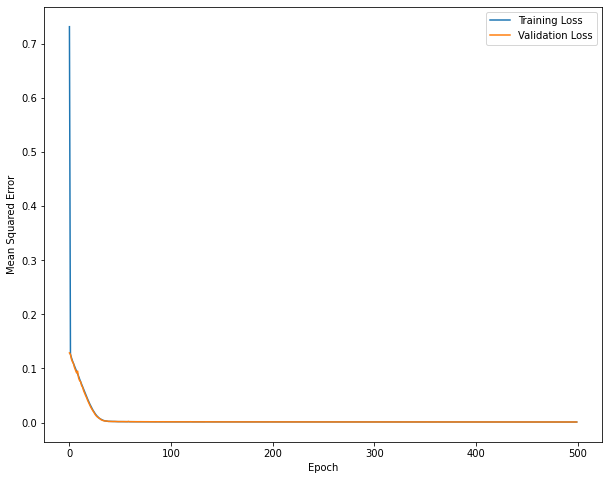

In [ ]:
history = NN_model.fit(OHE_train, y_train, epochs=500, batch_size=256, validation_split = 0.2)
mse_train = history.history['loss']
mse_val = history.history['val_loss']
plot_the_loss_curve(mse_train, mse_val)

In [ ]:
print("\n Evaluate the linear regression model against the test set:")
result = NN_model.evaluate(x=OHE_train, y=y_train, batch_size=batch_size)

for item in zip(NN_model.metrics_names, result):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
423/423 [==============================] - 1s 3ms/step - loss: 9.6099e-04 - mean_squared_error: 8.6589e-04 - mean_absolute_percentage_error: 1685.8285 - mean_absolute_error: 0.0181 - coeff_determination: 0.8807
loss 0.0009609902044758201
mean_squared_error 0.0008658863371238112
mean_absolute_percentage_error 1685.8284912109375
mean_absolute_error 0.018058152869343758
coeff_determination 0.8806769847869873


In [ ]:
print(f"train_rmse: {np.sqrt(0.0008658863371238112)}")

train_rmse: 0.029425946664870636


In [ ]:
print("\n Evaluate the linear regression model against the test set:")
result = NN_model.evaluate(x=OHE_test, y=y_test, batch_size=batch_size)

for item in zip(NN_model.metrics_names, result):
  print (item[0], item[1])


 Evaluate the linear regression model against the test set:
106/106 [==============================] - 0s 3ms/step - loss: 9.7740e-04 - mean_squared_error: 8.8229e-04 - mean_absolute_percentage_error: 17.5687 - mean_absolute_error: 0.0183 - coeff_determination: 0.8789
loss 0.0009773963829502463
mean_squared_error 0.0008822919917292893
mean_absolute_percentage_error 17.56874656677246
mean_absolute_error 0.018300997093319893
coeff_determination 0.8789492249488831


In [ ]:
print(f"test: {np.sqrt(0.0008822919917292893)}")

test: 0.029703400339511455
